# Анализ данных пользователей сервиса аренды самокатов GoFast 

Цель:
<br>Проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Данные: 
<br>users_go.csv - Таблица с пользователями сервиса
<br>rides_go.csv - Таблица с поездками пользователей
<br>datasets/subscriptions_go.csv - тарифы пользования сервисом

План:
<a id='toc0_'></a>    
- [Анализ данных пользователей сервиса аренды самокатов GoFast](#toc1_)    
  - [Шаг 1. Загрузка данных](#toc1_1_)    
  - [Шаг 2. Предобработка данных](#toc1_2_)    
    - [Пользователи](#toc1_2_1_)    
    - [Поездки](#toc1_2_2_)    
    - [Подписки](#toc1_2_3_)    
    - [Вывод](#toc1_2_4_)    
  - [Шаг 3. Исследовательский анализ данных](#toc1_3_)    
    - [частота встречаемости городов](#toc1_3_1_)    
    - [соотношение пользователей с подпиской и без подписки;](#toc1_3_2_)    
    - [возраст пользователей](#toc1_3_3_)    
    - [расстояние, которое пользователь преодолел за одну поездку](#toc1_3_4_)    
    - [продолжительность поездок](#toc1_3_5_)    
    - [Выводы](#toc1_3_6_)    
  - [Шаг 4. Объединение данных](#toc1_4_)    
    - [Объединить в один dataframe](#toc1_4_1_)    
    - [Делим данные под типу подписки](#toc1_4_2_)    
    - [Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.](#toc1_4_3_)    
    - [Вывод](#toc1_4_4_)    
  - [Шаг 5. Подсчёт выручки](#toc1_5_)    
    - [Создайте датафрейм с агрегированными данными о поездках](#toc1_5_1_)    
    - [Месячная выручка](#toc1_5_2_)    
    - [Вывод](#toc1_5_3_)    
  - [Шаг 6. Проверка гипотез](#toc1_6_)    
    - [Тратят ли пользователи с подпиской больше время на поездки](#toc1_6_1_)    
    - [Превышает ли расстояние поездки платных пользователей оптимальное в 3130](#toc1_6_2_)    
    - [От какого типа пользователей выручка выше](#toc1_6_3_)    
    - [Какой тест понадобится для проверки гипотезы об уменьшии обрещений в поддержку](#toc1_6_4_)    
    - [Выводы](#toc1_6_5_)    
  - [Шаг 7. Распределения](#toc1_7_)    
    - [Количество промокодов для рассылки](#toc1_7_1_)    
    - [Вывод](#toc1_7_2_)    
    - [Оценка открытия PUSH уведомлений](#toc1_7_3_)    
    - [Вывод](#toc1_7_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
from numpy import random
from math import sqrt

## Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('datasets/users_go.csv')
    rides = pd.read_csv('datasets/rides_go.csv')
    subs = pd.read_csv('datasets/subscriptions_go.csv')
    
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

## Шаг 2. Предобработка данных

In [3]:
def dataframe_info_extended(df: pd.DataFrame):
    print('-------HEAD-----')
    display(df.head())
    print()
    print('-------INFO-----')
    print(df.info())
    print()
    print('---NA---')
    print(df.isna().sum())    
    print()
    print('---DUPLICATED---')
    print(df.duplicated().sum())

### Пользователи

In [4]:
dataframe_info_extended(users)

-------HEAD-----


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



-------INFO-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

---NA---
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

---DUPLICATED---
31


In [5]:
users = users.drop_duplicates().reset_index(drop=True)

In [6]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [7]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [8]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

1. Пропусков нет  
2. Дубли удалили
3. Аномальных значений возраста и города нет


### Поездки

In [9]:
dataframe_info_extended(rides)

-------HEAD-----


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



-------INFO-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

---NA---
user_id     0
distance    0
duration    0
date        0
dtype: int64

---DUPLICATED---
0


In [10]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [11]:
rides.query('distance < 10')['distance'].count()

5

In [12]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [13]:
rides.query('duration < 1')['distance'].count()

95

In [14]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
print(rides['date'].min())
print(rides['date'].max())

2021-01-01 00:00:00
2021-12-30 00:00:00


In [15]:
rides['month'] = rides['date'].dt.month
rides['month'].describe()

count    18068.000000
mean         6.486772
std          3.437410
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64

1. Пропусков и дублей - нет
2. Пробег в метрах, есть 5 коротких поездок, исключим их если потребуется анализ расстояния
3. Продолжительность сессии в минутах, есть 95 поездок меньше 1 минуты, исключить их если потребуется анализ продолжительности поездки
4. Данные за 2022 года, без аномалий

### Подписки

In [16]:
print(subs.info())
subs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Вывод
В датасетах представленны данные о пользователях, их поездках и описание тарифов сервиса. В данных о пользователях убраны явные дубликаты. Данные о поездках представлены за 2021 год. Среди поездок есть подозрительно короткие, нужно помнить о них и возможно исклчить из анализа времени поездки.

## Шаг 3. Исследовательский анализ данных

### 3.1 частота встречаемости городов

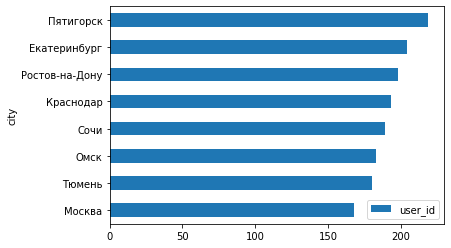

In [17]:
(
    users.pivot_table(index='city', values='user_id', aggfunc='count')
    .sort_values(by='user_id')
    .plot
    .barh()
);

Интересно, что столица на последнем месте по количеству поездок, а Пятигорск - город самокатчиков.

### 3.2 соотношение пользователей с подпиской и без подписки;

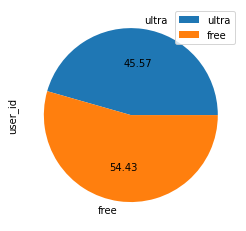

In [18]:
(
    users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .sort_values(by='user_id')
    .plot
    .pie(y='user_id', autopct='%.2f')
);

In [19]:
users.query('subscription_type == "ultra"')['user_id'].count() / users['user_id'].count()

0.4556714471968709

45,5% пользователей имеют ultra подписку

### 3.3 возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


<AxesSubplot:>

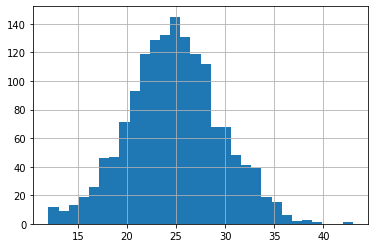

In [20]:
print(users['age'].describe())
users['age'].hist(bins=30)

### 3.4 расстояние, которое пользователь преодолел за одну поездку

<AxesSubplot:>

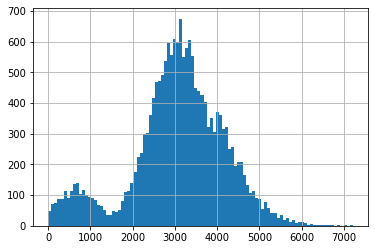

In [21]:
rides['distance'].hist(bins=100)

### 3.5 продолжительность поездок

<AxesSubplot:>

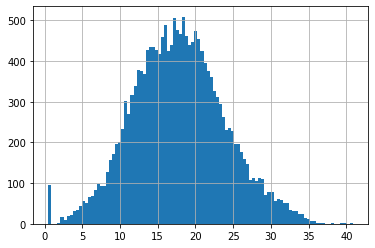

In [22]:
rides['duration'].hist(bins=100)

<AxesSubplot:>

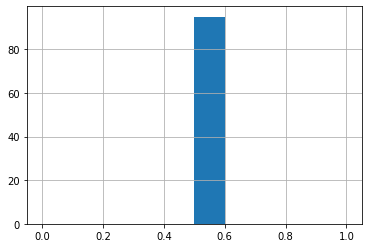

In [23]:
rides.query('duration < 1.5')['duration'].hist()

### Выводы
1. Интересно, что столица на последнем месте по количеству поездок, а Пятигорск - город самокатчиков. 
2. ~45% пользователей имеют ultra подписку
3. Возраст пользователей имеет нормальное распределение в границах от 12 до 43 с медианой - 25 лет. Странно, что есть пользователи до 18 лет, обычно они не должны допускаться до управления электросамокатом.
4. Чаще всего самокаты используют либо для коротких поездок, от 0 до 1300 метров, либо для долгих с 2000, до 5000 метров. В этих диапазонах дистанция поездок имеет нормальное распределение.
5. Длительность поездки в минутах имеет нормальное распределение, с исключением в значенении 0,6 - возможно это минимальное тарифицируемое значение, и когда пользователь "включает/выключает" аренду самоката, в лог пишется именно это значение. Я думаю этим поздки стоит исключить из последующего анализа.

## Шаг 4. Объединение данных

### 4.1 Объединить в один dataframe

In [25]:
df = rides.merge(users, on='user_id')
df = df.merge(subs, on='subscription_type')
df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


### 4.2 Делим данные под типу подписки

In [26]:
df_ultra = df.query('subscription_type == "ultra"')
df_free = df.query('subscription_type == "free"')

In [27]:
# Код ревьюера
display(df.shape[0])
display(df_free.shape[0])
df_ultra.shape[0]

18068

11568

6500

In [28]:
df.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

<AxesSubplot:>

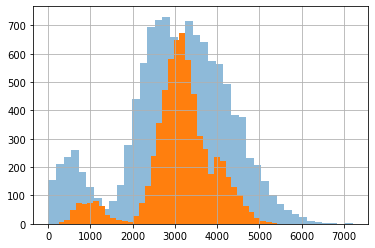

In [29]:
ax = df_free['distance'].hist(bins=40, alpha=0.5, label='free')
df_ultra['distance'].hist(bins=40, ax=ax,  label='ultra')


<AxesSubplot:>

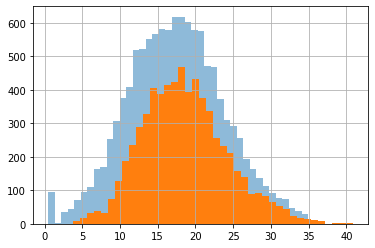

In [30]:
ax = df_free['duration'].hist(bins=40, alpha=0.5, label='free')
df_ultra['duration'].hist(bins=40, ax=ax,  label='ultra')

### Вывод
Пользователи с подпиской реже ездят на короткие дистанции и чаще на длинные. Так же можно заметить, что медиана дистанции у коротких поездок пользователей с подпиской больше, чем у обычных, но на временном графике провалов нет, можно сделать вывод, что платные пользователи более опытные ездоки и на коротких дистанциях развивают большую скорость. Так же платные пользователи чуть дольше катаются (в срелнем на 1 минуту из предыдущих данных)

## Шаг 5. Подсчёт выручки

### Создайте датафрейм с агрегированными данными о поездках

In [31]:
df['duration'] = np.ceil(df['duration'])

In [32]:
df_by_month = df.pivot_table(index=['user_id', 'month'], \
                             values=['distance','duration','date','minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type'], \
                             aggfunc={'distance': 'sum', 'duration':'sum', 'date':'count', 'minute_price': 'max', 'start_ride_price': 'max', 'subscription_fee': 'max', 'subscription_type':'first'})
df_by_month = df_by_month.rename(columns={'date': 'rides_count', 'mon': 'month_count'})
df_by_month.head(10)

rides_count      distance  duration  minute_price  \
user_id month                                                      
1       1                2   7027.511294      42.0             6   
        4                1    754.159807       7.0             6   
        8                2   6723.470560      46.0             6   
        10               2   5809.911100      32.0             6   
        11               3   7003.499363      56.0             6   
        12               2   6751.629942      28.0             6   
2       3                3  10187.723006      63.0             6   
        4                2   6164.381824      40.0             6   
        6                1   3255.338202      14.0             6   
        7                2   6780.722964      48.0             6   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
        12                    0               199             ultra  
2       3                     0               199             ultra  
        4                     0               199             ultra  
        6                     0               199             ultra  
        7                     0               199             ultra

### 5.2 Месячная выручка

In [33]:
df_by_month['monthly_income'] = df_by_month['subscription_fee'] + df_by_month['rides_count'] * df_by_month['start_ride_price'] + df_by_month['duration'] * df_by_month['minute_price']

df_by_month.head()

rides_count     distance  duration  minute_price  \
user_id month                                                     
1       1                2  7027.511294      42.0             6   
        4                1   754.159807       7.0             6   
        8                2  6723.470560      46.0             6   
        10               2  5809.911100      32.0             6   
        11               3  7003.499363      56.0             6   

               start_ride_price  subscription_fee subscription_type  \
user_id month                                                         
1       1                     0               199             ultra   
        4                     0               199             ultra   
        8                     0               199             ultra   
        10                    0               199             ultra   
        11                    0               199             ultra   

               monthly_income  
user_id month                  
1       1               451.0  
        4               241.0  
        8               475.0  
        10              391.0  
        11              535.0

In [34]:
df_by_month['monthly_income'].median()

319.0

### Вывод
Мы получили данные о месячных доходах в разрезе каждого пользователя и месяца. Медианное значение - 319.

In [35]:
# Код ревьюера
df_by_month.groupby('subscription_type')['monthly_income'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: monthly_income, dtype: float64

## Шаг 6. Проверка гипотез

### 6.1 Тратят ли пользователи с подпиской больше время на поездки

In [36]:
print('Среднее время с подпиской:', df_ultra['duration'].mean())
print('Среднее время без подписки:', df_free['duration'].mean())

Среднее время с подпиской: 18.54198516280583
Среднее время без подписки: 17.39090929866399


Вывод: Пользователе с подпиской тратят в среднем на поездке больше на 1 минуту, чем пользователи без подписки

In [37]:
# H0 - средние выборок равны
# H1 - среднее ultra пользователей больше
alpha = 0.05
# использую параметр equal_var=False потому что размер выборок разный 
# и уровень отношения пользователей к сервису разный
results = st.ttest_ind(df_ultra['duration'], df_free['duration'], equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Вывод: пользователи с Ultra подпиской тратят на поездки больше времени

### 6.2 Превышает ли расстояние поездки платных пользователей оптимальное в 3130

In [38]:
print('Отношение поездок длиннее оптимального к общему количество поездок', 
      df_ultra.query('distance > 3130')['distance'].count() / df_ultra['distance'].count())

Отношение поездок длиннее оптимального к общему количество поездок 0.5153846153846153


Вывод: В 51,5% случаев поездки пользователей с подпиской превышают оптимальное расстояние.

In [39]:
# H0 - расстояние = 3130
# H1 - расстояние < 3130

optimal_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    df_ultra['distance'],
    optimal_distance,
    alternative='less'
)  

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.08046311521502146
Не отвергаем нулевую гипотезу


Вывод: Премиум подписчики в среднем проезжают оптимальное расстояние

### 6.3 От какого типа пользователей выручка выше

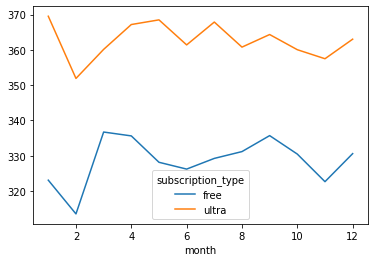

1.1036876983262058

In [40]:
monthly_income = df_by_month.pivot_table(index='month', columns='subscription_type', values='monthly_income')
monthly_income.plot();
plt.show()
monthly_income['ultra'].mean() / monthly_income['free'].mean()

От платных польхователей выручка больше, чем от бесплатных, в среднем на 10%

In [41]:
# H0 - средние выборок равны
# H1 - среднее ultra пользователей больше
alpha = 0.05
# использую параметр equal_var=False потому что размер выборок разный 
# и уровень отношения пользователей к сервису разный
results = st.ttest_ind(
    df_by_month.query('subscription_type == "ultra"')['monthly_income'], 
    df_by_month.query('subscription_type == "free"')['monthly_income'],
    equal_var=False, 
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Вывод: Месячный доход от ultra пользователей выше

### 6.4 Какой тест понадобится для проверки гипотезы об уменьшии обрещений в поддержку
Если количество данных по обращениям пользователей возможно обработать полностью, то мы сможем посчитать изменение среднего количества орбащений пользователя за одинаковый период до обновления и после и сравнить эти два значения. Если весь массив данных обработрать будет невозможно и нам придеться проверять гипотезу на выборке, то мы можем воспользоваться **t тестом двух зависимых выборок** (ttest_rel)

### Выводы
1. Пользователи с Ultra подпиской тратят на поездки больше времени
2. Пользователи с Ultra подпиской в среднем проезжают оптимальное расстояние
3. От платных пользователей выручка больше, чем от бесплатных

## Шаг 7. Распределения

### 7.1 Количество промокодов для рассылки

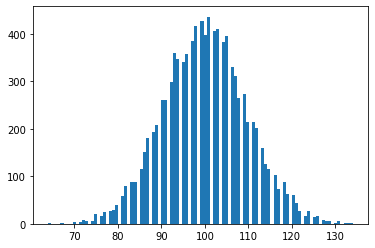

In [42]:
# Построим график распределения для N = 1000
n = 1000
p = 0.1

x = random.binomial(n , p , size = 10000)
plt.hist(x, bins=100)
plt.show()



При N = 1000 примерно в половине случаев количество успехов меньше 100, а нам надо снизить эту вероятность до 5%

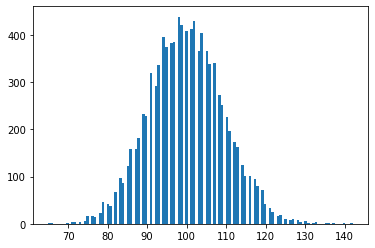

In [43]:
# изменяя n , на глаз по графику определяем чтобы количество успешных исходов менее 100, составляло мененее 5% от общей площади фигуры
p = 0.1

x = random.binomial(n , p , size = 10000)
plt.hist(x, bins=120)
plt.show()

In [44]:
# проверим подобранное значение с помощью функции cdf
k = 99
n = 1200
p = 0.1
binom.cdf(k, n, p)

0.02204279834979755

In [45]:
# ещё немного подкрутим N
k = 99
n = 1161
p = 0.1
binom.cdf(k, n, p)

0.04976090094990249

Полученное число читается как:  
Вероятность получить менее 100 успехов, при 1161 попытке с вероятностью успеха 0,1 составляет ~0,0497

In [46]:
k = 99
p = 0.1
n = 1
while binom.cdf(k, n, p) > 0.05:
    n += 1
print("Количество промокодов для раздачи:", n)
        

Количество промокодов для раздачи: 1161


### Вывод 
Чтобы обеспечить вероятность не выполнить план в 100 клиентов меншьше, чем 5% необходимо разослать минимум 1161 промокод.

### 7.2 Оценка открытия PUSH уведомлений
С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 
399,5 тыс. пользователей.

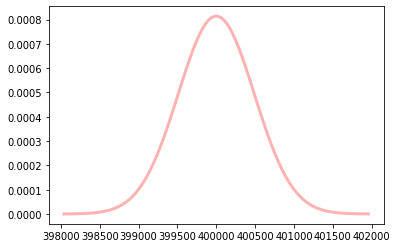

In [47]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

x = linspace(left, right, 100)

ax = plt.subplot()
ax.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3)

plt.show()

In [48]:
distr = st.norm(mu, sigma) 
result = distr.cdf(399500)
print(result)

0.15371708296369768


### Вывод
Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет 15,3%

## ВЫВОД

Мы провели исследование поездок пользователей сервиса GoFast. 
1. При исследовании данных заметили, что в Пятигорске сервис наиболее популярен, а в столице наименее востребован. 
2. 45% пользователей имеют ultra подписку
3. Медианный возраст пользователя - 25 лет, диапазон 12-43
4. Средняя продолжительно поездки 15-20 минут
5. Чаще всего самокаты используют либо для коротких поездок, от 0 до 1300 метров, либо для долгих с 2000, до 5000 метров. В этих диапазонах дистанция поездок имеет нормальное распределение.
6. Профили поездок премиум пользователей и обычных схожи, с небольшими нюансами (ultra пользователи ездят чуть дольше и чуть быстрее)
7. Пользователи с Ultra подпиской тратят на поездки больше времени
8. Пользователи с Ultra подпиской в среднем проезжают оптимальное расстояние

## Вывод доп задания
1. Чтобы обеспечить вероятность не выполнить план в 100 клиентов меншьше, чем 5% необходимо разослать минимум 1161 промокод.
2. Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет 15,3%


<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
    
<b>Общий комментарий ревьюера V2:</b>

Ты проделал большую работу над проектом. Но нужно кое-что поправить, чтобы я его принял.
    
Есть несколько критических замечаний:
    
- по округлению времени поездки для расчета выручки
- по проверке гипотез
- по общему выводу
    
Также, постарайся отработать желтые комментарии.
    
Буду ждать твой доработанный проект. ⌛️</div>

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
    
<b>Общий комментарий ревьюера V3</b>

Спасибо, что учел мои замечания и доработал проект, получилась очень хорошая работа! 
    
Успехов в дальнейшем обучении! 🏆
    
</div>